<a href="https://colab.research.google.com/github/dxmolnar/EPL_Final_Standing_Forecaster/blob/main/EPL_Forecaster_Gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from pathlib import Path
import matplotlib.pyplot as plt
from google.colab import files
import sqlite3
import os
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
uploaded = files.upload()

Saving Team_Value_10_11.csv to Team_Value_10_11.csv
Saving Team_Value_11_12.csv to Team_Value_11_12.csv
Saving Team_Value_12_13.csv to Team_Value_12_13.csv
Saving Team_Value_13_14.csv to Team_Value_13_14.csv
Saving Team_Value_14_15.csv to Team_Value_14_15.csv
Saving Team_Value_15_16.csv to Team_Value_15_16.csv
Saving Team_Value_16_17.csv to Team_Value_16_17.csv
Saving Team_Value_17_18.csv to Team_Value_17_18.csv
Saving Team_Value_18_19.csv to Team_Value_18_19.csv
Saving Team_Value_19_20.csv to Team_Value_19_20.csv
Saving Team_Value_20_21.csv to Team_Value_20_21.csv
Saving Team_Value_21_22.csv to Team_Value_21_22.csv
Saving Team_Value_22_23.csv to Team_Value_22_23.csv


In [ ]:
os.listdir()

['.config',
 'Team_Value_13_14.csv',
 'Team_Value_22_23.csv',
 'Team_Value_15_16.csv',
 'drive',
 'Team_Value_11_12.csv',
 'Team_Value_19_20.csv',
 'Team_Value_20_21.csv',
 'Team_Value_21_22.csv',
 'Team_Value_14_15.csv',
 'Team_Value_12_13.csv',
 'Team_Value_17_18.csv',
 'Team_Value_18_19.csv',
 'Team_Value_16_17.csv',
 'Team_Value_10_11.csv',
 'sample_data']

In [ ]:
# List of file names for all the CSV files you want to read.
file_names = [
    'Team_Value_10_11.csv',
    'Team_Value_11_12.csv',
    'Team_Value_12_13.csv',
    'Team_Value_13_14.csv',
    'Team_Value_14_15.csv',
    'Team_Value_15_16.csv',
    'Team_Value_16_17.csv',
    'Team_Value_17_18.csv',
    'Team_Value_18_19.csv',
    'Team_Value_19_20.csv',
    'Team_Value_20_21.csv',
    'Team_Value_21_22.csv',
    'Team_Value_22_23.csv',
]

In [ ]:
# Initialize an empty list to store DataFrames for each CSV file.
data_frames = []

In [ ]:
# Loop through each file, read it as a DataFrame, and append it to the list.
for file_name in file_names:
    df = pd.read_csv(file_name)
    data_frames.append(df)

In [ ]:
# Concatenate all DataFrames into one big DataFrame.
epl_database = pd.concat(data_frames, ignore_index=True)

In [ ]:
# Print the first few rows of the DataFrame
print(epl_database.head())

# Print the summary information about the DataFrame
print(epl_database.info())

# Print the column names
print(epl_database.columns)



                Team  Season  Final Position  Number of Players  Medium Age  \
0         Chelsea FC    2010               2               33.0        25.5   
1    Manchester City    2010               3               45.0        24.4   
2  Manchester United    2010               1               43.0        25.1   
3       Liverpool FC    2010               6               42.0        24.5   
4         Arsenal FC    2010               4               34.0        24.4   

   Foreigners Medium Market Value Total Market Value  
0          23              12.85m             424.1m  
1          28               8.98m            404.18m  
2          29               9.02m               388m  
3          25               8.08m             339.2m  
4          27               9.53m               324m  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               -------------- 

In [ ]:
epl_database.shape

(260, 8)

In [ ]:
epl_database.drop(columns=epl_database.columns[epl_database.columns.str.startswith('Unnamed')], inplace=True)


In [ ]:
epl_database.head(2)

,Team,Season,Final Position,Number of Players,Medium Age,Foreigners,Medium Market Value,Total Market Value
0,Chelsea FC,2010,2,33.0,25.5,23,12.85m,424.1m
1,Manchester City,2010,3,45.0,24.4,28,8.98m,404.18m


In [ ]:
epl_database_4 = epl_database.drop(columns=["Medium Age", "Foreigners", "Number of Players", "Medium Market Value"])

In [ ]:
epl_database_4 = epl_database_4.set_index('Season')

In [ ]:
print(epl_database_4.head(100))

                        Team  Final Position Total Market Value
Season                                                         
2010              Chelsea FC               2             424.1m
2010         Manchester City               3            404.18m
2010       Manchester United               1               388m
2010            Liverpool FC               6             339.2m
2010              Arsenal FC               4               324m
...                      ...             ...                ...
2014          Crystal Palace              10             97.25m
2014    West Bromwich Albion              13             95.95m
2014          Sunderland AFC              16             91.00m
2014          Leicester City              14             66.70m
2014              Burnley FC              19             52.55m

[100 rows x 3 columns]


In [ ]:
print(epl_database_4['Team'].value_counts())

Chelsea FC                 13
Manchester United          13
Liverpool FC               13
Arsenal FC                 13
Tottenham Hotspur          13
Everton FC                 13
Manchester City            13
West Ham United            12
Newcastle United           12
Southampton FC             11
Crystal Palace             10
Aston Villa                10
West Bromwich Albion        9
Leicester City              9
Stoke City                  8
Swansea City                7
Burnley FC                  7
Wolverhampton Wanderers     7
Fulham FC                   7
Sunderland AFC              7
Norwich City                6
Watford FC                  6
AFC Bournemouth             6
Brighton & Hove Albion      6
Wigan Athletic              3
Queens Park Rangers         3
Leeds United                3
Hull City                   3
Huddersfield Town           2
Blackburn Rovers            2
Brentford FC                2
Cardiff City                2
Bolton Wanderers            2
Sheffield 

In [ ]:
epl_database_4[epl_database_4['Final Position']== 1]

,Team,Final Position,Total Market Value
Season,,,
2010,Manchester United,1,388m
2011,Manchester City,1,498.60m
2012,Manchester United,1,457.50m
2013,Manchester City,1,455.80m
2014,Chelsea FC,1,557.25m
2015,Leicester City,1,161.10m
2016,Chelsea FC,1,686.70m
2017,Manchester City,1,1.01bn
2018,Manchester City,1,1.20bn


In [ ]:
print(epl_database_4['Team'].describe())


count            260
unique            39
top       Chelsea FC
freq              13
Name: Team, dtype: object


In [ ]:
print(epl_database_4.head())

                     Team  Final Position Total Market Value
Season                                                      
2010           Chelsea FC               2             424.1m
2010      Manchester City               3            404.18m
2010    Manchester United               1               388m
2010         Liverpool FC               6             339.2m
2010           Arsenal FC               4               324m


In [ ]:
# Convert 'Total Market Value' column to numeric
def convert_market_value(value):
    if isinstance(value, str):  # Check if the value is a string
        value = value.replace('€', '')  # Remove the '€' symbol
        if 'bn' in value:
            return float(value.replace('bn', '')) * 1000000000  # Convert 'bn' to billions
        elif 'm' in value:
            return float(value.replace('m', '')) * 1000000  # Convert 'm' to millions
    return value  # Return the value unchanged if it is already numeric (e.g., float)

# Applying the convert_market_value function to 'Total Market Value' column


In [ ]:
epl_database_4['Total Market Value'] = epl_database_4['Total Market Value'].apply(convert_market_value)


In [ ]:
print(epl_database_4.head())

                     Team  Final Position  Total Market Value
Season                                                       
2010           Chelsea FC               2         424100000.0
2010      Manchester City               3         404180000.0
2010    Manchester United               1         388000000.0
2010         Liverpool FC               6         339200000.0
2010           Arsenal FC               4         324000000.0


In [ ]:
print("Unique values in 'Total Market Value':")
print(epl_database_4['Total Market Value'].unique())

Unique values in 'Total Market Value':
[4.2410e+08 4.0418e+08 3.8800e+08 3.3920e+08 3.2400e+08 3.0738e+08
 2.0280e+08 1.8448e+08 1.4933e+08 1.3875e+08 1.1948e+08 1.0955e+08
 1.0015e+08 9.5380e+07 9.4450e+07 9.1530e+07 8.6880e+07 8.3550e+07
 8.0500e+07 5.0030e+07 4.9860e+08 4.0410e+08 3.7550e+08 3.6243e+08
 3.2350e+08 2.3690e+08 1.6995e+08 1.6170e+08 1.2650e+08 1.2350e+08
 1.0000e+08 9.0050e+07 8.1650e+07 8.1380e+07 8.0000e+07 7.8050e+07
 7.5600e+07 7.4250e+07 6.9550e+07 5.8750e+07 5.0210e+08 4.5750e+08
 4.5425e+08 2.9690e+08 2.9680e+08 2.7610e+08 2.0175e+08 1.3975e+08
 1.3390e+08 1.2005e+08 1.1085e+08 1.1050e+08 1.0405e+08 1.0300e+08
 1.0225e+08 9.3000e+07 9.1550e+07 8.3050e+07 7.3250e+07 4.6250e+07
 5.8420e+08 4.5580e+08 4.0255e+08 3.8575e+08 3.1575e+08 2.8895e+08
 2.1000e+08 1.7230e+08 1.3150e+08 1.2893e+08 1.2200e+08 1.1265e+08
 1.0950e+08 1.0470e+08 9.0800e+07 8.9300e+07 8.7900e+07 6.8700e+07
 6.8150e+07 5.5725e+08 5.0540e+08 4.4825e+08 4.1475e+08 3.2485e+08
 3.0415e+08 2.1025e+08 

In [ ]:
epl_database_4 = epl_database_4.reset_index()
print(epl_database_4)

     index  Season               Team  Final Position  Total Market Value
0        0    2010         Chelsea FC               2         424100000.0
1        1    2010    Manchester City               3         404180000.0
2        2    2010  Manchester United               1         388000000.0
3        3    2010       Liverpool FC               6         339200000.0
4        4    2010         Arsenal FC               4         324000000.0
..     ...     ...                ...             ...                 ...
255    255    2022       Brentford FC               9         371200000.0
256    256    2022       Leeds United              19         345150000.0
257    257    2022     Crystal Palace              11         323050000.0
258    258    2022          Fulham FC              10         295250000.0
259    259    2022    AFC Bournemouth              15         287200000.0

[260 rows x 5 columns]


In [ ]:
team_with_highest_value = epl_database_4.loc[epl_database_4.groupby('Season')['Total Market Value'].idxmax()]
team_with_highest_value.head(2)

,index,Season,Team,Final Position,Total Market Value
0,0,2010,Chelsea FC,2,424100000.0
20,20,2011,Manchester City,1,498600000.0


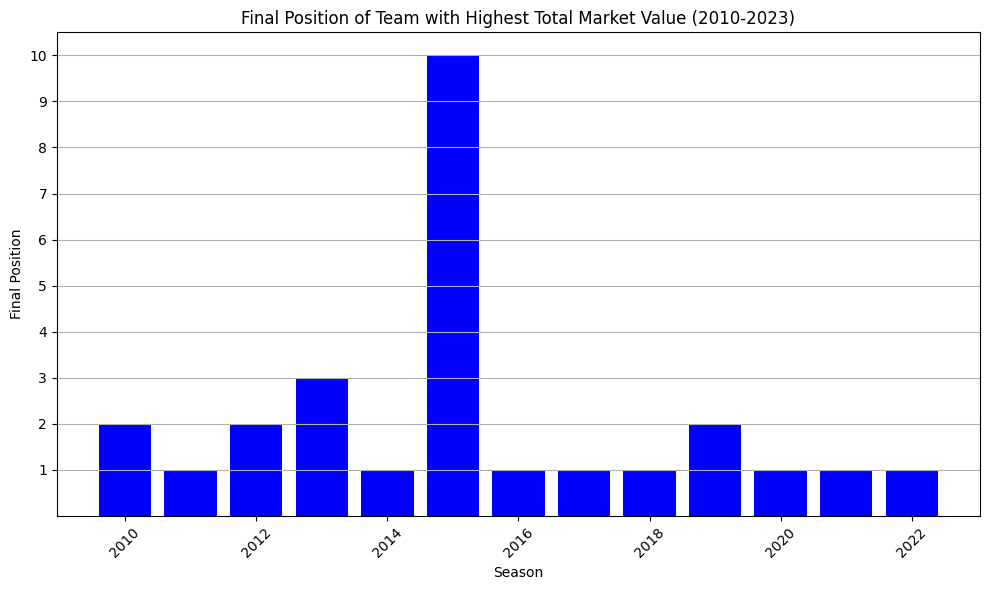

In [ ]:
# Create a bar plot to show the final position of the team with the highest "Total Market Value" for each season
plt.figure(figsize=(10, 6))
plt.bar(team_with_highest_value['Season'], team_with_highest_value['Final Position'], color='b')
plt.title('Final Position of Team with Highest Total Market Value (2010-2023)')
plt.xlabel('Season')
plt.ylabel('Final Position')
plt.xticks(rotation=45)
plt.yticks(range(1, 11))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
epl_database_4.columns

Index(['Season', 'Team', 'Final Position', 'Total Market Value'], dtype='object')

In [ ]:
import seaborn as sns

<Axes: xlabel='Final Position', ylabel='Total Market Value'>

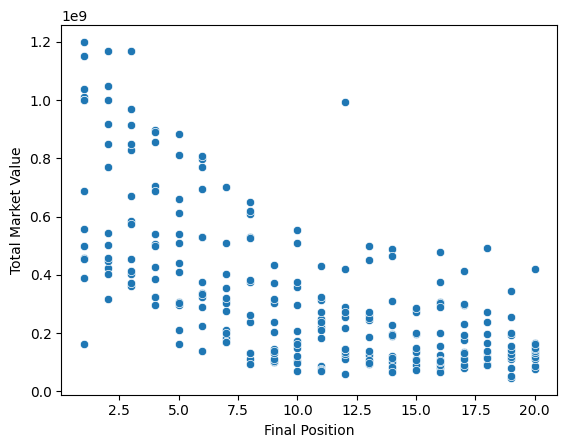

In [ ]:
#epl_database_4[['Total Market Value','Final Position']].plot(kind='bar',rot=0)
sns.scatterplot(x = epl_database_4['Final Position'],y=epl_database_4['Total Market Value'])

In [ ]:
team_with_lowest_value = epl_database_4.loc[epl_database_4.groupby('Season')['Total Market Value'].idxmin()]


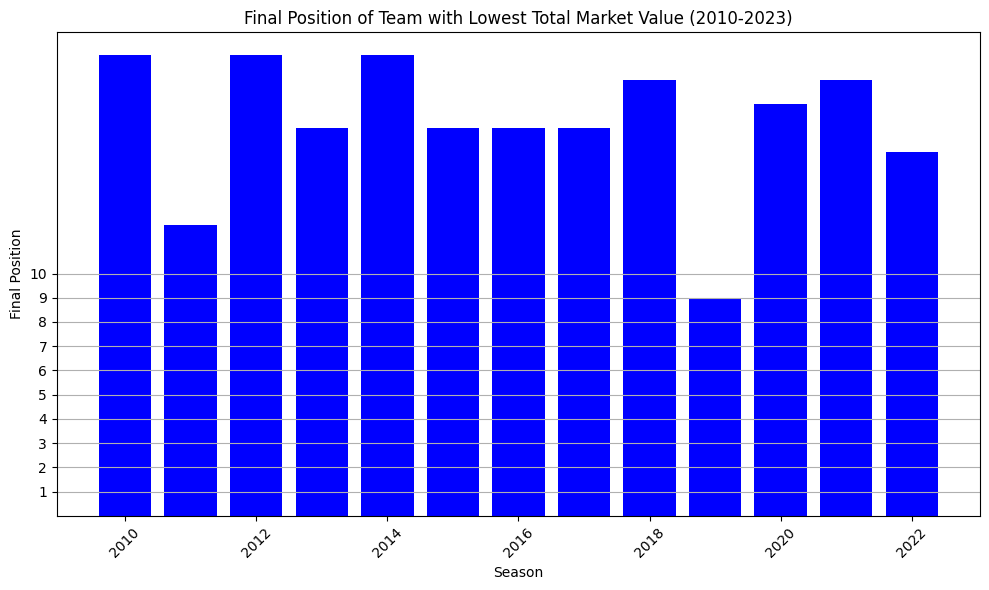

In [ ]:
# Create a bar plot to show the final position of the team with the lowest "Total Market Value" for each season
plt.figure(figsize=(10, 6))
plt.bar(team_with_lowest_value['Season'], team_with_lowest_value['Final Position'], color='b')
plt.title('Final Position of Team with Lowest Total Market Value (2010-2023)')
plt.xlabel('Season')
plt.ylabel('Final Position')
plt.xticks(rotation=45)
plt.yticks(range(1, 11))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
epl_database_4

,Season,Team,Final Position,Total Market Value
0,2010,Chelsea FC,2,424100000.0
1,2010,Manchester City,3,404180000.0
2,2010,Manchester United,1,388000000.0
3,2010,Liverpool FC,6,339200000.0
4,2010,Arsenal FC,4,324000000.0
...,...,...,...,...
255,2022,Brentford FC,9,371200000.0
256,2022,Leeds United,19,345150000.0
257,2022,Crystal Palace,11,323050000.0
258,2022,Fulham FC,10,295250000.0


# Training the Machine Learning Model
---
### Gradient Boosting Regressor

In [ ]:
epl_database_4.set_index('Season', inplace=True)

In [ ]:
X = epl_database_4['Total Market Value'].values
y = epl_database_4['Final Position'].values


In [ ]:
epl_database_4

,Season,Team,Final Position,Total Market Value
0,2010,Chelsea FC,2,424100000.0
1,2010,Manchester City,3,404180000.0
2,2010,Manchester United,1,388000000.0
3,2010,Liverpool FC,6,339200000.0
4,2010,Arsenal FC,4,324000000.0
...,...,...,...,...
255,2022,Brentford FC,9,371200000.0
256,2022,Leeds United,19,345150000.0
257,2022,Crystal Palace,11,323050000.0
258,2022,Fulham FC,10,295250000.0


In [ ]:
# Convert X and y into Pandas Series
X_series = pd.Series(X, name='Total Market Value')
y_series = pd.Series(y, name='Final Position')

In [ ]:
all(X.index == epl_database_4.index)

AttributeError: ignored

In [ ]:
print("Shape of X DataFrame:", X.shape)
print("Shape of y DataFrame:", y.shape)


Shape of X DataFrame: (260,)
Shape of y DataFrame: (260,)


In [ ]:
print("Shape of X DataFrame:", X.shape)
print("Shape of y DataFrame:", y.shape)


Shape of X DataFrame: (260,)
Shape of y DataFrame: (260,)


In [ ]:
# Concatenate the Series horizontally to create the new DataFrame
combined_df = pd.concat([X_series, y_series], axis=1)

In [ ]:
# Now you can work with the combined DataFrame as needed
print(combined_df)

     Total Market Value  Final Position
0           424100000.0               2
1           404180000.0               3
2           388000000.0               1
3           339200000.0               6
4           324000000.0               4
..                  ...             ...
255         371200000.0               9
256         345150000.0              19
257         323050000.0              11
258         295250000.0              10
259         287200000.0              15

[260 rows x 2 columns]


In [ ]:
#X = df.loc[:, ['Total Market Value']]
#y = df['Final Position']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
epl_database_4.head(2)

,Season,Team,Final Position,Total Market Value
0,2010,Chelsea FC,2,424100000.0
1,2010,Manchester City,3,404180000.0


In [ ]:
team = LabelEncoder().fit_transform(epl_database_4['Team'])

In [ ]:
team = pd.Series(team)
X_s = pd.Series(X)

In [ ]:
team

0      11
1      20
2      21
3      19
4       1
       ..
255     7
256    17
257    12
258    14
259     0
Length: 260, dtype: int64

In [ ]:
features = pd.concat([X_s,team],join='inner',axis=1)

In [ ]:
features.shape

(260, 2)

In [ ]:
# Step 3: Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)


In [ ]:
X_train.columns

RangeIndex(start=0, stop=2, step=1)

In [ ]:
print(X_train)

               0   1
60   584200000.0  11
247  529830000.0   8
16    86880000.0  35
55    93000000.0  35
125  425650000.0  19
..           ...  ..
20   498600000.0  20
188  320330000.0  38
71   112650000.0  14
106  249850000.0  13
102  457850000.0   1

[208 rows x 2 columns]


In [ ]:
# Step 4: Build the Gradient Boosting Model
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)


GradientBoostingRegressor()

In [ ]:
# Step 6: Make predictions and evaluate the model
y_pred = gbm_model.predict(X_test)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)


In [ ]:
y_pred_int = y_pred.round().astype(int)


In [ ]:
# Generate the classification report
class_names = [str(i) for i in range(1, 21)]  # Class names from 1 to 20
report = classification_report(y_test, y_pred_int, target_names=class_names)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          12       0.25      0.40      0.31         5
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.50      0.33      0.40         3
          16       0.00      0.00      0.00         7
          17       0.00      0.00      0.00         4
          18       0.00    

In [ ]:
# Calculate and print the overall accuracy
accuracy = sum(y_pred_int == y_test) / len(y_test)
print("\nAccuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 5.77%


In [ ]:
epl_database_4


,Season,Team,Final Position,Total Market Value
0,2010,Chelsea FC,2,424100000.0
1,2010,Manchester City,3,404180000.0
2,2010,Manchester United,1,388000000.0
3,2010,Liverpool FC,6,339200000.0
4,2010,Arsenal FC,4,324000000.0
...,...,...,...,...
255,2022,Brentford FC,9,371200000.0
256,2022,Leeds United,19,345150000.0
257,2022,Crystal Palace,11,323050000.0
258,2022,Fulham FC,10,295250000.0


## Predicting Probability Percentile Ranking

In [ ]:
# Create a DataFrame with desired total market value percentiles
desired_percentiles = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
